In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from rdkit.Chem import Draw, AllChem
from rdkit import Chem
qm9 = pd.read_csv('../data/qm9.csv')
data = list(qm9['SMILES1'])
zz = np.load('qm9node.npy')
#pccs = np.corrcoef(x, y)
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

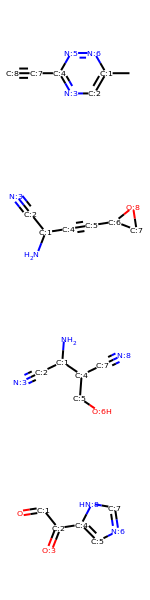

In [111]:
cnt = np.random.randint(0,len(data),4)
# cnt = [83046, 79559, 48904, 102185]
cnt = [125343,  56404, 99567, 25295]
# cnt = [ 9058,  42478,  129648, 15203]
a = [data[int(x)] for x in cnt]
mols = [mol_with_atom_index(Chem.MolFromSmiles(x)) for x in a]
img=Draw.MolsToGridImage(mols, molsPerRow=1, subImgSize=(150,150))
img

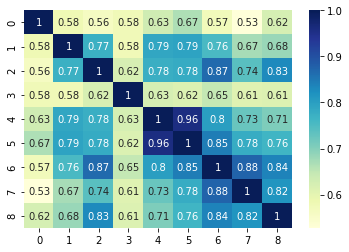

In [114]:
zs = [np.array(zz[int(x)]) for x in cnt]
# ss = [cosine_similarity(x) for x in zs]
# ss = [np.corrcoef(x) for x in zs]
#s = np.corrcoef(z)

ss = [cosine_similarity(x) for x in zs]
fig = plt.figure(figsize = (6, 4))
cmmp = 'YlGnBu'

# 221代表创建2行2列一共4个子图，并从左往右第1个子图开始绘图。
ax1 = fig.add_subplot(111)  
sns.heatmap(ss[1],annot=True, cmap=cmmp)

# ax2 = fig.add_subplot(221)  
# sns.heatmap(ss[1],annot=True, cmap=cmmp)

# ax3 = fig.add_subplot(223)  
# sns.heatmap(ss[2],annot=True, cmap=cmmp)

# ax4 = fig.add_subplot(224)  
# sns.heatmap(ss[3],annot=True, cmap=cmmp)
plt.savefig('simheat01.png')
plt.show()

In [12]:
cnt

array([ 59922,  21984, 104188, 107918])

In [34]:
ss[0].shape

(9, 9)

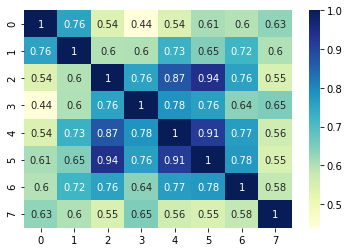

In [67]:
m = cosine_similarity(zs[0][:8,:]) 
fig = plt.figure(figsize = (6, 4))
cmmp = 'YlGnBu'

# 221代表创建2行2列一共4个子图，并从左往右第1个子图开始绘图。
ax1 = fig.add_subplot(111)  
sns.heatmap(m,annot=True, cmap=cmmp)
# plt.savefig('simheat00.png')
plt.show()